### The program tries to build a K-means-clustering algorithm through a mathematical model. Instead of using built-in functions for realizing the K-means clustering of data, the concept behind the K-means algorithm has been realized through mathematical operations.

In [4]:
## FIZA FAIZ -   MSM-BA       K-Means Assignment HW ##

#importing libraries 

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np


In [5]:
#initializing and creating the main function

randnums= np.random.randint(1,101,100)
randnums1= np.random.randint(1,101,100)
randnums2= np.random.randint(1,101,100)
  
k = 3
points_2d = []#TODO: Filling array randomly
points_3d = []#TODO: Filling array randomly
for i in range(1,100):
  points_2d.append((randnums[i],randnums1[i] ))
  points_3d.append((randnums[i],randnums1[i],randnums2[i] ))


centroids_2d = [[0, 0], [1, 1],[2, 2]]  # TODO: Making an initial random guess
centroids_3d = [[0, 0,0], [1, 1,1],[2, 2,2]] # TODO: Making an initial random guess
clusters_2d = [] # cluster for 2d array 
clusters_3d = [] # cluster for 3d array 

def main():

  for i in range(k):
    clusters_2d.append({"centroid": centroids_2d[i], "points":[]})
    clusters_3d.append({"centroid": centroids_3d[i], "points":[]})
    
  iters = 0 
  while iters < 100:

    for cluster in clusters_2d:
        cluster["points"] = []
    for cluster in clusters_3d:
        cluster["points"] = []

    # for adding to cluster for 2d plot 
    for point in points_2d:
      centroid_close = closest_centroid_2d(point)
      add_to_cluster_2d(point, centroid_close)

    # for adding to cluster for 3d plot 
    for point in points_3d:
      centroid_close_3d = closest_centroid_3d(point)
      add_to_cluster_3d(point, centroid_close_3d)
    
    #for updating cluster points in 2d plot

    for cluster in clusters_2d:
      mean = calculate_cluster_mean_2d(cluster)
      cluster["centroid"] = mean

    #for updating cluster points in 3d plot
  
    for cluster in clusters_3d:
      mean = calculate_cluster_mean_3d(cluster)
      cluster["centroid"] = mean
    
    iters = iters + 1 
    
  
  colors = ['r', 'g', 'b']
  i=0
  j = 0

  # plotting 2d plot  
  for cluster in clusters_2d:
    col = colors[i]
    i+=1

      #plot each points
    for point in cluster["points"]:
      plt.scatter(point[0], point[1], c = col)

    #plot the centroid
    plt.scatter(cluster["centroid"][0], cluster["centroid"][1], c = "black", s=300, marker='*')
  plt.show()
  


  # plotting 3d plot
  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')
  
  for cluster in clusters_3d:
    col = colors[j]
    j+=1
    for point in cluster["points"]:
      ax.scatter(point[0], point[1], point[2] , c = col)
    ax.scatter(cluster["centroid"][0], cluster["centroid"][1], cluster["centroid"][2],c = "black", s=300, marker='*')
  plt.show()




In [6]:
#centroid calculation 


#centroid calculation for 2d plot
def closest_centroid_2d(point):
    cluster_index =  0
    k = 3
    mini = 10000000
    for i in range(k):
        dist = np.linalg.norm(np.array(clusters_2d[i]["centroid"])- np.array(point))
        if dist < mini:
            mini = dist 
            cluster_index = i
            #print(clusters[cluster_index]["centroid"])
    return clusters_2d[cluster_index]["centroid"]



#centroid calculation for 3d plot
def closest_centroid_3d(point):
    cluster_index =  0
    k = 3
    mini = 10000000
    for i in range(k):
        
        dist = np.linalg.norm(np.array(clusters_3d[i]["centroid"])- np.array(point))
        if dist < mini:
            mini = dist 
            cluster_index = i
    return clusters_3d[cluster_index]["centroid"]



In [7]:
#adding points to clusters
#adding to 2d cluster
def add_to_cluster_2d(point, centroid_close):
  for cluster in clusters_2d:
    if(cluster["centroid"][0] == centroid_close[0] and cluster["centroid"][1] == centroid_close[1]):
      cluster["points"].append(point)
  

#adding to 3d cluster
def add_to_cluster_3d(point, centroid_close):
  for cluster in clusters_3d:
    if(cluster["centroid"][0] == centroid_close[0] and cluster["centroid"][1] == centroid_close[1] and cluster["centroid"][2] == centroid_close[2]):
      cluster["points"].append(point)


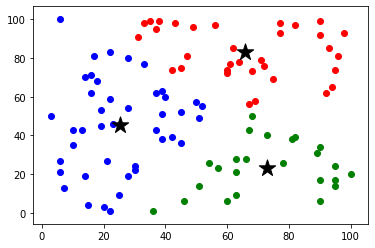

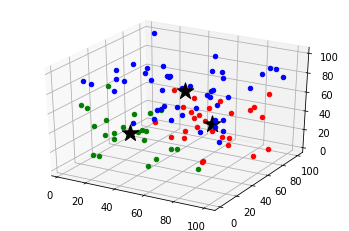

In [8]:
#calculating the cluster means 


#calculating the cluster mean for 2d plot
def calculate_cluster_mean_2d(cluster):
  points = cluster["points"]
  x = 0
  y = 0
  length = len(points)
  if (length == 0): 
    return (np.random.randint(100, size=2))
  
  for point in points:
    x += point[0]
    y += point[1]
  return (x/length,y/length)

#calculating the cluster mean for 3d plot
def calculate_cluster_mean_3d(cluster):
  points = cluster["points"]
  x = 0
  y = 0
  z = 0
  length = len(points)
  if (length == 0): 
    return (np.random.randint(100, size=3))
  
  for point in points:
    x += point[0]
    y += point[1]
    z += point[2]
  return (x/length,y/length,z/length)

main()
